In [1]:
load("titanic.raw.rdata")

In [2]:
# install.packages("arules")
library(arules)
library(Matrix)


Warning message:
: package 'arules' was built under R version 3.3.1Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [3]:
rules <- apriori(titanic.raw)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE     0.1      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [4]:
inspect(rules)

   lhs                                   rhs           support   confidence
1  {}                                 => {Age=Adult}   0.9504771 0.9504771 
2  {Class=2nd}                        => {Age=Adult}   0.1185825 0.9157895 
3  {Class=1st}                        => {Age=Adult}   0.1449341 0.9815385 
4  {Sex=Female}                       => {Age=Adult}   0.1930940 0.9042553 
5  {Class=3rd}                        => {Age=Adult}   0.2848705 0.8881020 
6  {Survived=Yes}                     => {Age=Adult}   0.2971377 0.9198312 
7  {Class=Crew}                       => {Sex=Male}    0.3916402 0.9740113 
8  {Class=Crew}                       => {Age=Adult}   0.4020900 1.0000000 
9  {Survived=No}                      => {Sex=Male}    0.6197183 0.9154362 
10 {Survived=No}                      => {Age=Adult}   0.6533394 0.9651007 
11 {Sex=Male}                         => {Age=Adult}   0.7573830 0.9630272 
12 {Sex=Female,Survived=Yes}          => {Age=Adult}   0.1435711 0.9186047 
13 {Class=3r

In [6]:
rules <- apriori(titanic.raw, parameter = list(minlen=2, supp=0.005, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
rules

set of 12 rules 

In [7]:
rules.sorted <- sort(rules, by="lift") 

In [8]:
inspect(rules.sorted)

   lhs                                  rhs            support     confidence
1  {Class=2nd,Age=Child}             => {Survived=Yes} 0.010904134 1.0000000 
7  {Class=2nd,Sex=Female,Age=Child}  => {Survived=Yes} 0.005906406 1.0000000 
4  {Class=1st,Sex=Female}            => {Survived=Yes} 0.064061790 0.9724138 
10 {Class=1st,Sex=Female,Age=Adult}  => {Survived=Yes} 0.063607451 0.9722222 
2  {Class=2nd,Sex=Female}            => {Survived=Yes} 0.042253521 0.8773585 
5  {Class=Crew,Sex=Female}           => {Survived=Yes} 0.009086779 0.8695652 
11 {Class=Crew,Sex=Female,Age=Adult} => {Survived=Yes} 0.009086779 0.8695652 
8  {Class=2nd,Sex=Female,Age=Adult}  => {Survived=Yes} 0.036347115 0.8602151 
9  {Class=2nd,Sex=Male,Age=Adult}    => {Survived=No}  0.069968196 0.9166667 
3  {Class=2nd,Sex=Male}              => {Survived=No}  0.069968196 0.8603352 
12 {Class=3rd,Sex=Male,Age=Adult}    => {Survived=No}  0.175829169 0.8376623 
6  {Class=3rd,Sex=Male}              => {Survived=No}  0.1917310

In [9]:
subset.matrix <- is.subset(rules.sorted, rules.sorted)

subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA

redundant <- colSums(subset.matrix, na.rm=T) >= 1


In [10]:
which(redundant)

{Class=2nd,Sex=Female,Age=Child,Survived=Yes} 
                                             2 
 {Class=1st,Sex=Female,Age=Adult,Survived=Yes} 
                                             4 
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} 
                                             7 
 {Class=2nd,Sex=Female,Age=Adult,Survived=Yes} 
                                             8

In [11]:
rules.pruned <- rules.sorted[!redundant]

# inspecter

inspect(rules.pruned)


   lhs                               rhs            support     confidence
1  {Class=2nd,Age=Child}          => {Survived=Yes} 0.010904134 1.0000000 
4  {Class=1st,Sex=Female}         => {Survived=Yes} 0.064061790 0.9724138 
2  {Class=2nd,Sex=Female}         => {Survived=Yes} 0.042253521 0.8773585 
5  {Class=Crew,Sex=Female}        => {Survived=Yes} 0.009086779 0.8695652 
9  {Class=2nd,Sex=Male,Age=Adult} => {Survived=No}  0.069968196 0.9166667 
3  {Class=2nd,Sex=Male}           => {Survived=No}  0.069968196 0.8603352 
12 {Class=3rd,Sex=Male,Age=Adult} => {Survived=No}  0.175829169 0.8376623 
6  {Class=3rd,Sex=Male}           => {Survived=No}  0.191731031 0.8274510 
   lift    
1  3.095640
4  3.010243
2  2.715986
5  2.691861
9  1.354083
3  1.270871
12 1.237379
6  1.222295


In [12]:
library(arulesViz)
library(grid)


Warning message:
: package 'arulesViz' was built under R version 3.3.1Loading required package: grid


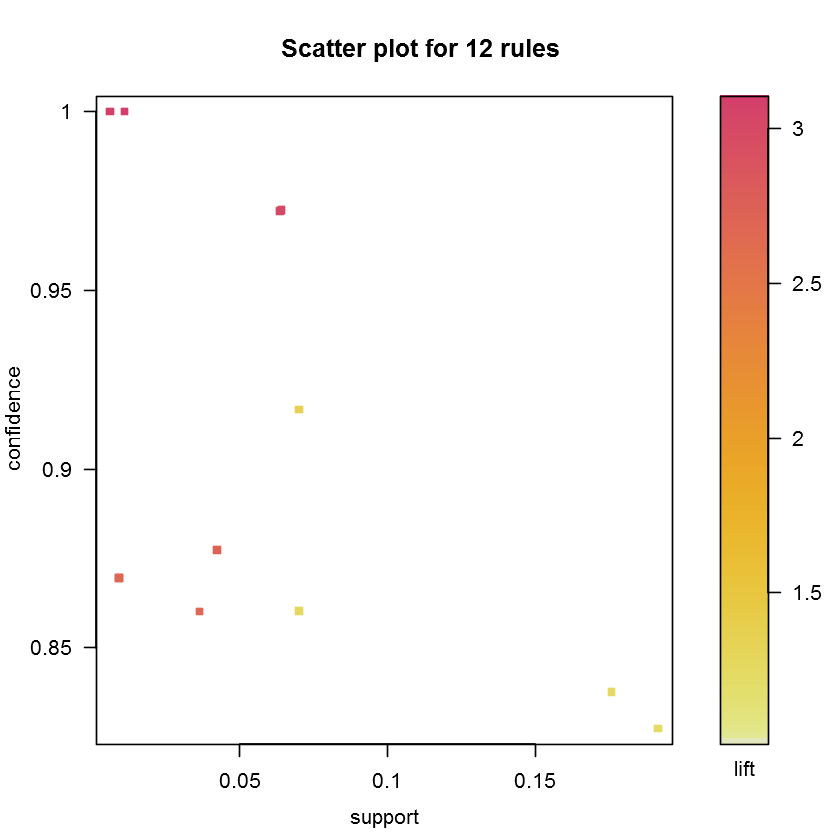

In [13]:
plot(rules)

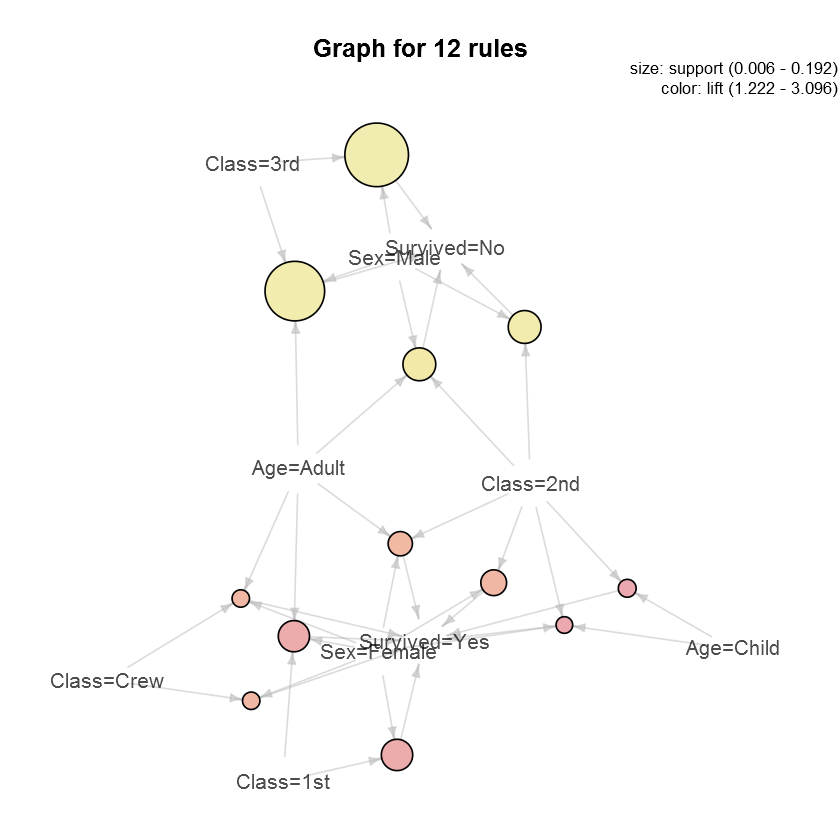

In [14]:
plot(rules, method="graph", control=list(type="items"))